In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Scrapper/final.csv', header=None)
df.rename(columns={0: 'comment', 1: 'category'}, inplace=True)

In [3]:
# df.head()
df.category.unique()

array(['positive', 'suggestion', 'question', 'other', 'correction',
       'negative'], dtype=object)

In [4]:
df['category_id'] = df['category'].factorize()[0]
df.head()

,comment,category,category_id
0,Love you sir!!,positive,0
1,Please make videos on..Midpoint circle drawing...,suggestion,1
2,I bought both of your courses on Udemy. You ar...,question,2
3,"Thank you very much, u really got me in the fi...",positive,0
4,i hope u are ok with everything going on again...,other,3


In [5]:
# print(df[df.isna().any(axis=1)])
df.isnull().sum()

comment        0
category       0
category_id    0
dtype: int64

In [6]:
df.shape

(1205, 3)

In [7]:
# preprocessing
import re

# lowercasing
df['comment'] = df['comment'].str.lower()

# removing urls
df['comment'] = df['comment'].str.replace('http\S+|www.\S+', '', case=False)

# removing new lines "\n"
df['comment'] = df['comment'].replace('\n','', regex=True)

# removing all the punctuations
df["comment"] = df['comment'].str.replace('[^\w\s]',' ')

# removing integers
df['comment'] = df['comment'].replace('\d','', regex=True)

# removing emojis
df['comment'] = df['comment'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)
df

,comment,category,category_id
0,love you sir,positive,0
1,please make videos on midpoint circle drawing...,suggestion,1
2,i bought both of your courses on udemy you ar...,question,2
3,thank you very much u really got me in the fi...,positive,0
4,i hope u are ok with everything going on again...,other,3
...,...,...,...
1200,what is the purpose of writing main function,question,2
1201,your teaching skill is awesome,positive,0
1202,we can use online compiler to run a program t...,question,2
1203,c programs can be compiled in browser and that...,question,2


In [8]:
# # removing punctuations except ! and ?
# import string

# def remove_punctuations(text):
    
#     punct = string.punctuation
#     punct = punct.replace('!', '')
#     punct = punct.replace('?', '')
    
#     for punctuation in punct:
#         text = text.replace(punctuation, '')
#     return text

# df["comment"] = df['comment'].apply(remove_punctuations)
# df

In [19]:
# # replacing sequence of "!" with single "!"
# def replace(string, char): 
#     pattern = char + '{2,}'
#     string = re.sub(pattern, char, string)
#     return string 

# char = '!'

# for index, row in df.iterrows():
#     df = df.append({'comment':replace(row['comment'], char), 'category':row['category']}, ignore_index=True)
# df

In [10]:
# correcting the typos
from autocorrect import Speller

spell = Speller(lang='en')

def typo_corrector(text):
    return spell(text)

df['comment'] = df['comment'].apply(typo_corrector)
df

,comment,category,category_id
0,love you sir,positive,0
1,please make videos on midpoint circle drawing...,suggestion,1
2,i bought both of your courses on demy you are...,question,2
3,thank you very much u really got me in the fi...,positive,0
4,i hope u are ok with everything going on again...,other,3
...,...,...,...
1200,what is the purpose of writing main function,question,2
1201,your teaching skill is awesome,positive,0
1202,we can use online compiler to run a program t...,question,2
1203,c programs can be compiled in browser and that...,question,2


In [11]:
# stemming
import nltk

stemmer = nltk.stem.SnowballStemmer('english')
def stem_text(text):
    return stemmer.stem(text)

df['comment'] = df['comment'].apply(stem_text)


# lemmatizing
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return lemmatizer.lemmatize(text)

df['comment'] = df['comment'].apply(lemmatize_text)
df

,comment,category,category_id
0,love you sir,positive,0
1,please make videos on midpoint circle drawing...,suggestion,1
2,i bought both of your courses on demy you are...,question,2
3,thank you very much u really got me in the fi...,positive,0
4,i hope u are ok with everything going on again...,other,3
...,...,...,...
1200,what is the purpose of writing main funct,question,2
1201,your teaching skill is awesome,positive,0
1202,we can use online compiler to run a program t...,question,2
1203,c programs can be compiled in browser and that...,question,2


In [22]:
# category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
# category_to_id = dict(category_id_df.values)
# id_to_category = dict(category_id_df[['category_id', 'category']].values)
# df.head()

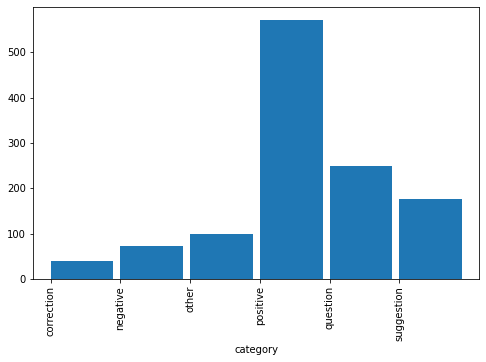

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,5))
df.groupby('category').comment.count().plot.bar(align='edge', width=0.9)
plt.show()

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=False, min_df=5, norm='l2', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.comment).toarray()

features.shape

(1205, 370)

In [44]:
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
# from sklearn.feature_selection import chi2
# import numpy as np
# N = 2

# for Product, category_id in sorted(category_to_id.items()):
#     features_chi2 = chi2(features, labels == category_id)
#     indices = np.argsort(features_chi2[0])
#     feature_names = np.array(tfidf.get_feature_names())[indices]
#     unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
#     bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
#     print("# '{}':".format(Product))
#     print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
#     print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

In [46]:
# # visualizing
# import seaborn as sns
# sns.lmplot('comment', df, hue='Class', fit_reg=False)
# fig = plt.gcf()
# fig.set_size_inches(15, 10)
# plt.show()


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['comment'], df['category_id'], random_state = 0)

In [48]:
# print(clf.predict(count_vect.transform(["please upload"])))



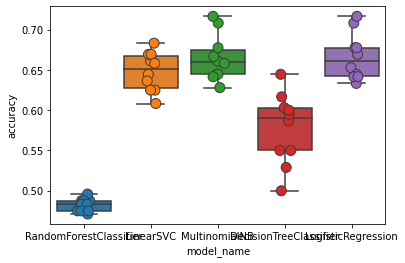

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score


labels = df.category_id
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

cv_df = pd.DataFrame()
entries = []

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=10)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, size=10, jitter=True, linewidth=1)
plt.show()

In [56]:
cv_df.index

RangeIndex(start=0, stop=50, step=1)

In [57]:
cv_df.groupby('model_name').accuracy.mean()

model_name
DecisionTreeClassifier    0.577534
LinearSVC                 0.648099
LogisticRegression        0.666398
MultinomialNB             0.664787
RandomForestClassifier    0.482142
Name: accuracy, dtype: float64

In [ ]:
# model = LinearSVC()

# X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# from sklearn.metrics import confusion_matrix

# conf_mat = confusion_matrix(y_test, y_pred)
# fig, ax = plt.subplots(figsize=(10,10))
# sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.show()

In [23]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['category'].unique()))

NameError: name 'y_pred' is not defined